***Importar las librerias necesarias, así como definir las funciones necesarias para representar los dataframes***

In [1]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#Funcion para obtener un grafico de Velas 

def candle_plot(df):
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

    fig.show()

In [3]:
#La función que extrae los datos de la API de YahooFinance para poder trabajar el dataframe 
def data_reader(empresa):
    data = yf.download(
        tickers= empresa,
        period="4y",
        interval="1d",
        keepna= False,
        group_by="column",
        rounding=True)
    #Obtengo el df, y establezco el indice, el tipo de objeto de cada dataframe
    data.columns = data.columns.str.replace('Adj Close', 'Adj_Close')
    data = data.reset_index()
    data.Date = pd.to_datetime(data.Date, utc=True)
    #Obtengo el retorno diario de la acción 
    returns = ((data['Adj_Close']/data['Adj_Close'].shift(1))-1)
    log_returns = np.log(1 + data['Adj_Close'].pct_change())
    data['Retorno']=returns
    data['Retorno_log']=log_returns
    data['Codigo empresa'] = empresa
    data = data.fillna(0)
    data.to_csv("/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos/"+empresa+".csv")

    '''
    Aquí se utiliza la API de Yahoo finance, la cual se comprende de:
    el ticker: Que es el código con el que se la empresa se identifica en la pagina. 
    el periodo, el cual es el intervalo de tiempo que quieres extraer 
    el keepna, que sirve para eliminar los valores nulos 
    como quiere ser agrupado 
    y si se quiere hacer un redondeo

    Se le cambia los nombres a varias columnas para que estas puedan manejarse mejor, y se trabaja mejor el 
    dataframe

    se utiliza numpy para realizar operaciones matemáticas como obtener los retornos 
    y el Fillna porque cuando sacas los retornos, el primer valor que te aparecerá será un Nan que puede ser sustituido por un 0 
    luego los datos de la empresa se guardan en un CSV.
    '''

In [4]:
#Función que lee los CSV uno por uno, los guarda en una concatena los dataframes hacia abajo 

def concatenador(x):
    import glob
    import os

    carpeta_csv ='/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos' # utiliza tu propia ruta 
    todo_csv = glob.glob(os.path.join(carpeta_csv , "*.csv"))
#DEBES DE UTILIZAR UNA RUTA PERSONAL PARA EXTRAER LOS CSVs 
    lista = []

    for el_csv in todo_csv:
        the_data_base = pd.read_csv(el_csv, header=1)
        lista.append(the_data_base)

    bancos = pd.concat(lista, axis=0, ignore_index=False)

In [2]:
def grafica_creator(df):
    # Initialize figure
    fig = go.Figure()
    name = str(df['Codigo empresa'].unique())
# Agregar las diferentes graficas

    fig.add_trace(
            go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

    fig.add_trace(
            go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

    fig.add_trace(
            go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

    fig.add_trace(
            go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Se agregan las anotaciones, y se crean los botones para cada una de las tablas 
    high_annotations = [dict(x="2019-01-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=0, ay=-40)]
    low_annotations = [dict(x="2019-01-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

    fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label="None",
                        method="update",
                        args=[{"visible": [True, False, True, False]},
                           {"title": name,
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": name,
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": name ,
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": name,
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

     

# Set title
    fig.update_layout(title_text=name)

    fig.show()

***Inicia creando una lista con los valores de las empresas que quieres recopilar los datos***

In [5]:
empresas = ['SAB.MC','BKT.MC','CABK.MC','BBVA.MC','SAN.MC']
#Aqui se gurada una lista con los tickers para que sea más facil conseguir los datos 

In [6]:
#Bucle for que me itera los elementos de la lista y me los pasa por la función para obtener los datos
for x in empresas:
    data_reader(x)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
caixa = pd.read_csv('/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos/CABK.MC.csv')

In [4]:
caixa.Date = pd.to_datetime(caixa['Date'], utc = True)

In [5]:
del caixa['Unnamed: 0']
caixa.set_index('Date', inplace=True)
caixa_mensual = caixa.resample("BM").mean()

In [6]:
caixa_mensual = caixa.resample("BM").mean()
caixa_mensual['Codigo empresa'] = 'CABK.MC'

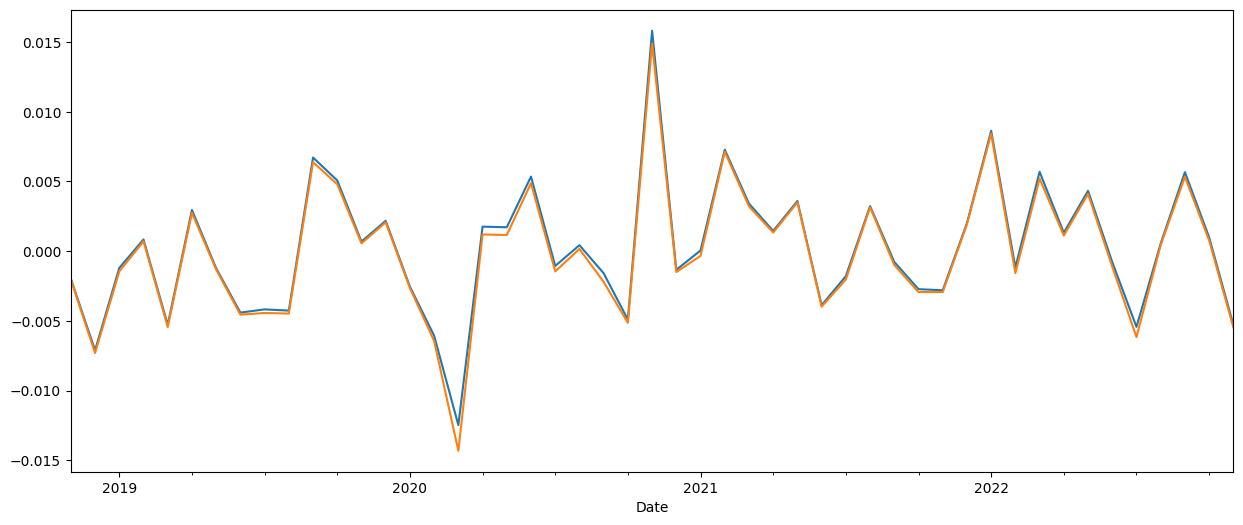

In [7]:
caixa_mensual
caixa_mensual['Retorno'].plot(figsize=(15,6))
caixa_mensual['Retorno_log'].plot(figsize=(15,6))
plt.show()

In [8]:
santander = pd.read_csv('/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos/SAN.MC.csv')


In [9]:
del santander['Unnamed: 0']
santander.Date = pd.to_datetime(santander['Date'], utc = True)
santander.set_index('Date', inplace=True)
santander_mensual = santander.resample("BM").mean()
santander_mensual['Codigo empresa']='SAN.MC'

In [10]:
df = pd.concat([caixa, santander], axis = 0)

In [11]:
bbva = pd.read_csv('/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos/BBVA.MC.csv')
del bbva['Unnamed: 0']
bbva.Date = pd.to_datetime(bbva['Date'], utc = True)
bbva.set_index('Date', inplace=True)
bbva_mensual = bbva.resample("BM").mean()
bbva_mensual['Codigo empresa']='BBVA.MC'

In [12]:
bankinter = pd.read_csv('/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos/BKT.MC.csv')
del bankinter['Unnamed: 0']
bankinter.Date = pd.to_datetime(bankinter['Date'], utc = True)
bankinter.set_index('Date', inplace=True)
bankinter_mensual = bankinter.resample("BM").mean()
bankinter_mensual['Codigo empresa']='BKT.MC'

In [13]:
sabadell = pd.read_csv('/Users/josemanuel/Desktop/EDA Mercados Bursatiles del IBEX/Bancos/SAB.MC.csv')
del sabadell['Unnamed: 0']
sabadell.Date = pd.to_datetime(sabadell['Date'], utc = True)
sabadell.set_index('Date', inplace=True)
sabadell_mensual = sabadell.resample("BM").mean()
sabadell_mensual['Codigo empresa'] = 'SAB.MC'

In [14]:
df = pd.concat([caixa, santander, bbva, bankinter,sabadell], axis = 0)

In [15]:
df1 = pd.concat([caixa_mensual, santander_mensual, bbva_mensual, bankinter_mensual, sabadell_mensual], axis=0)

In [19]:
df1

,Open,High,Low,Close,Adj_Close,Volume,Retorno,Retorno_log,Codigo empresa
Date,,,,,,,,,
2018-11-30 00:00:00+00:00,3.681417,3.706750,3.637667,3.666000,3.209317,1.285128e+07,-0.001974,-0.002038,CABK.MC
2018-12-31 00:00:00+00:00,3.340526,3.373579,3.292895,3.316737,2.903568,1.373718e+07,-0.007108,-0.007303,CABK.MC
2019-01-31 00:00:00+00:00,3.267478,3.308435,3.231522,3.273174,2.865426,1.642768e+07,-0.001203,-0.001454,CABK.MC
2019-02-28 00:00:00+00:00,2.999800,3.029600,2.961500,2.997700,2.624265,1.883823e+07,0.000842,0.000713,CABK.MC
2019-03-29 00:00:00+00:00,2.941750,2.969050,2.900100,2.923250,2.559100,1.597695e+07,-0.005284,-0.005439,CABK.MC
...,...,...,...,...,...,...,...,...,...
2022-07-29 00:00:00+00:00,0.658850,0.672680,0.633870,0.649850,0.649850,4.466109e+07,-0.009058,-0.009837,SAB.MC
2022-08-31 00:00:00+00:00,0.657350,0.668433,0.648733,0.658692,0.658692,2.336608e+07,0.003069,0.002886,SAB.MC
2022-09-30 00:00:00+00:00,0.730286,0.746143,0.715495,0.731610,0.731610,3.883716e+07,0.001805,0.001333,SAB.MC


In [20]:
df

,Open,High,Low,Close,Adj_Close,Volume,Retorno,Retorno_log,Codigo empresa
Date,,,,,,,,,
2018-11-14 23:00:00+00:00,3.7300,3.7640,3.6800,3.7250,3.2610,12995101,0.000000,0.000000,CABK.MC
2018-11-15 23:00:00+00:00,3.7400,3.7780,3.7050,3.7270,3.2627,16795348,0.000521,0.000521,CABK.MC
2018-11-18 23:00:00+00:00,3.7390,3.7720,3.7110,3.7110,3.2487,10812519,-0.004291,-0.004300,CABK.MC
2018-11-19 23:00:00+00:00,3.6900,3.7010,3.6380,3.6600,3.2041,10453011,-0.013729,-0.013824,CABK.MC
2018-11-20 23:00:00+00:00,3.6800,3.7080,3.6550,3.6830,3.2242,9664031,0.006273,0.006254,CABK.MC
...,...,...,...,...,...,...,...,...,...
2022-11-08 23:00:00+00:00,0.8122,0.8230,0.8030,0.8106,0.8106,34927331,-0.002461,-0.002464,SAB.MC
2022-11-09 23:00:00+00:00,0.8108,0.8250,0.7794,0.7928,0.7928,52750072,-0.021959,-0.022204,SAB.MC
2022-11-10 23:00:00+00:00,0.7958,0.8048,0.7782,0.7854,0.7854,37260303,-0.009334,-0.009378,SAB.MC


In [16]:
import seaborn as sns

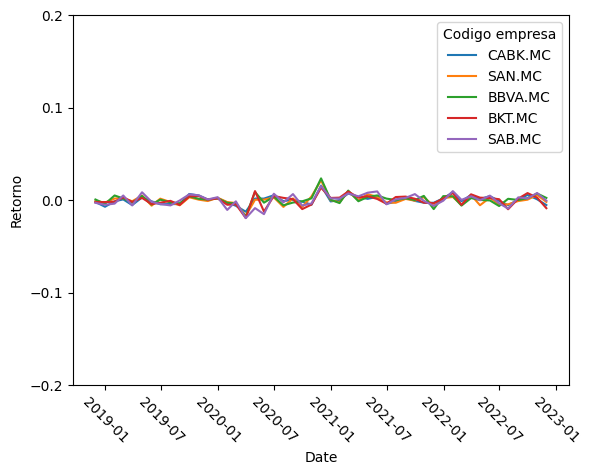

In [54]:
sns.lineplot(data=df1, x="Date", y="Retorno_log", hue='Codigo empresa')
y = [-0.2,-0.1,0,0.1,0.2]
plt.yticks(y)
plt.xticks(rotation=-45);


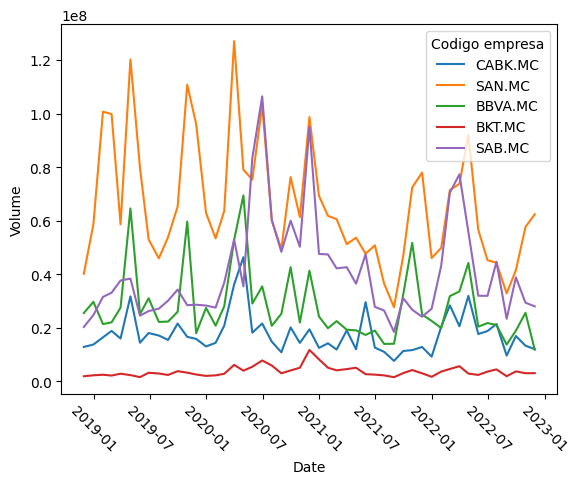

In [52]:
sns.lineplot(data=df1, x="Date", y="Volume", hue='Codigo empresa')
plt.xticks(rotation=-45);

In [28]:
df1['Codigo empresa'].unique()

array(['CABK.MC', 'SAN.MC', 'BBVA.MC', 'BKT.MC', 'SAB.MC'], dtype=object)

In [25]:
name = str(caixa['Codigo empresa'].unique())
name

"['CABK.MC']"

In [125]:
grafica_creator(bbva_mensual)

In [43]:
santander_mensual['Retorno'].mean()

1.5740992197369555e-05

In [29]:
#Obteniendo valores especificos para la memoria, rentabilidad promedio, anualizada, 
df3=df1[['Retorno', 'Retorno_log', 'Codigo empresa']]

In [30]:
df3

,Retorno,Retorno_log,Codigo empresa
Date,,,
2018-11-30 00:00:00+00:00,-0.001974,-0.002038,CABK.MC
2018-12-31 00:00:00+00:00,-0.007108,-0.007303,CABK.MC
2019-01-31 00:00:00+00:00,-0.001203,-0.001454,CABK.MC
2019-02-28 00:00:00+00:00,0.000842,0.000713,CABK.MC
2019-03-29 00:00:00+00:00,-0.005284,-0.005439,CABK.MC
...,...,...,...
2022-07-29 00:00:00+00:00,-0.009058,-0.009837,SAB.MC
2022-08-31 00:00:00+00:00,0.003069,0.002886,SAB.MC
2022-09-30 00:00:00+00:00,0.001805,0.001333,SAB.MC


In [52]:
df5 = df3.reset_index()
df5 = df5.set_index('Codigo empresa')
df5.groupby(df5['Date'].dt.year).mean()
#df5.groupby(df5['Codigo empresa','Date'].dt.year).mean()

,Retorno,Retorno_log
Date,,
2018,-0.002784,-0.002904
2019,0.000250,0.000086
2020,-0.001077,-0.001840
2021,0.001499,0.001276
2022,0.000836,0.000522


**Aquí se toman los DF y se pasan a años para poder ver la rentabilidad Anualizada**


In [55]:
caixa[['Retorno', 'Retorno_log',]].resample('BY').mean()
#Caixa estuvo 3 años con una rentabilidad negativa, pero con 
#la compra de Bankia pudo engrosar sus cuentas y aumentar su valor de mercado

,Retorno,Retorno_log
Date,,
2018-12-31 00:00:00+00:00,-0.005121,-0.005265
2019-12-31 00:00:00+00:00,-0.000148,-0.000342
2020-12-31 00:00:00+00:00,-0.000408,-0.000958
2021-12-31 00:00:00+00:00,0.000747,0.000580
2022-12-30 00:00:00+00:00,0.001764,0.001450


In [56]:
bbva[['Retorno', 'Retorno_log',]].resample('BY').mean()
#BBVA tuvo rentabilidad e incluso el año 2020 fue el que dentro de las perdidas el
#que menos dinero perdió 

,Retorno,Retorno_log
Date,,
2018-12-31 00:00:00+00:00,-0.002166,-0.002305
2019-12-31 00:00:00+00:00,0.000600,0.000485
2020-12-31 00:00:00+00:00,0.000091,-0.000609
2021-12-31 00:00:00+00:00,0.001359,0.001132
2022-12-30 00:00:00+00:00,0.000681,0.000433


In [57]:
santander[['Retorno', 'Retorno_log',]].resample('BY').mean()
#Salvo un minimo repunte en el 2019 el Santander ha estado en una tendencia 
#bajista desde antes de la pandemia 

,Retorno,Retorno_log
Date,,
2018-12-31 00:00:00+00:00,-0.001898,-0.002034
2019-12-31 00:00:00+00:00,0.000087,-0.000031
2020-12-31 00:00:00+00:00,-0.000491,-0.001140
2021-12-31 00:00:00+00:00,0.000851,0.000667
2022-12-30 00:00:00+00:00,-0.000118,-0.000382


In [58]:
bankinter[['Retorno', 'Retorno_log',]].resample('BY').mean()
#Una tendencia bajista que se ha ido recuperando, incluso puede mejorar su pico pre pandemico 

,Retorno,Retorno_log
Date,,
2018-12-31 00:00:00+00:00,-0.002096,-0.002190
2019-12-31 00:00:00+00:00,0.000032,-0.000099
2020-12-31 00:00:00+00:00,-0.001864,-0.002677
2021-12-31 00:00:00+00:00,0.001721,0.001544
2022-12-30 00:00:00+00:00,0.001425,0.001123


In [59]:
sabadell[['Retorno', 'Retorno_log',]].resample('BY').mean()
#Rentabilidad más alta en relación a los demas bancos 

,Retorno,Retorno_log
Date,,
2018-12-31 00:00:00+00:00,-0.004180,-0.004313
2019-12-31 00:00:00+00:00,0.000593,0.000324
2020-12-31 00:00:00+00:00,-0.002874,-0.004023
2021-12-31 00:00:00+00:00,0.002358,0.002007
2022-12-30 00:00:00+00:00,0.002030,0.001559


In [70]:
df3_1=df3.groupby(df3['Codigo empresa']).median()

In [120]:
df3_2= df3.groupby(df3['Codigo empresa']).mean()

In [121]:
df3_2

,Retorno,Retorno_log
Codigo empresa,,
BBVA.MC,0.000667,0.000355
BKT.MC,0.000102,-0.000246
CABK.MC,0.000155,-0.000141
SAB.MC,0.000254,-0.000280
SAN.MC,0.000016,-0.000278


*Los bancos en los ultimos 5 años han tenido una tendencia de bajada pre pandemica, y salvo el BBVA que a los ultimos 5 años ha mantenido una rentabilidad positiva.*

In [118]:
df4 = df1[['Codigo empresa','Volume']]

In [119]:
df4

,Codigo empresa,Volume
Date,,
2018-11-30 00:00:00+00:00,CABK.MC,1.285128e+07
2018-12-31 00:00:00+00:00,CABK.MC,1.373718e+07
2019-01-31 00:00:00+00:00,CABK.MC,1.642768e+07
2019-02-28 00:00:00+00:00,CABK.MC,1.883823e+07
2019-03-29 00:00:00+00:00,CABK.MC,1.597695e+07
...,...,...
2022-07-29 00:00:00+00:00,SAB.MC,4.466109e+07
2022-08-31 00:00:00+00:00,SAB.MC,2.336608e+07
2022-09-30 00:00:00+00:00,SAB.MC,3.883716e+07


In [83]:
df5= df4.groupby(df4['Codigo empresa']).tail(1)

In [84]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df5['Codigo empresa'], values=df5.Volume, hole=.3)])
fig.show()



In [90]:
df1.Retorno.var()

3.267550580944457e-05

In [36]:
import plotly.express as px


fig = px.area(df3, facet_col="Codigo empresa", facet_col_wrap=2, )
fig.show()



In [50]:
import plotly.express as px

fig = px.scatter(df1, x=df1.index, y='Retorno_log', color="Codigo empresa", symbol="Codigo empresa")
fig.show()

In [46]:
df1

,Open,High,Low,Close,Adj_Close,Volume,Retorno,Retorno_log,Codigo empresa
Date,,,,,,,,,
2018-11-30 00:00:00+00:00,3.681417,3.706750,3.637667,3.666000,3.209317,1.285128e+07,-0.001974,-0.002038,CABK.MC
2018-12-31 00:00:00+00:00,3.340526,3.373579,3.292895,3.316737,2.903568,1.373718e+07,-0.007108,-0.007303,CABK.MC
2019-01-31 00:00:00+00:00,3.267478,3.308435,3.231522,3.273174,2.865426,1.642768e+07,-0.001203,-0.001454,CABK.MC
2019-02-28 00:00:00+00:00,2.999800,3.029600,2.961500,2.997700,2.624265,1.883823e+07,0.000842,0.000713,CABK.MC
2019-03-29 00:00:00+00:00,2.941750,2.969050,2.900100,2.923250,2.559100,1.597695e+07,-0.005284,-0.005439,CABK.MC
...,...,...,...,...,...,...,...,...,...
2022-07-29 00:00:00+00:00,0.658850,0.672680,0.633870,0.649850,0.649850,4.466109e+07,-0.009058,-0.009837,SAB.MC
2022-08-31 00:00:00+00:00,0.657350,0.668433,0.648733,0.658692,0.658692,2.336608e+07,0.003069,0.002886,SAB.MC
2022-09-30 00:00:00+00:00,0.730286,0.746143,0.715495,0.731610,0.731610,3.883716e+07,0.001805,0.001333,SAB.MC


In [118]:
df2 = df.groupby(by= ['Codigo empresa']).mean()

In [123]:
df2[['Volume']]= df2[['Volume']].round()

In [124]:
df2

,Open,High,Low,Close,Adj_Close,Volume,Retorno,Retorno_log
Codigo empresa,,,,,,,,
BBVA.MC,4.557388,4.621121,4.492641,4.557242,4.097193,28088407.0,0.000591,0.000272
BKT.MC,5.034698,5.101608,4.960653,5.029201,4.605702,3711940.0,0.000215,-0.000135
CABK.MC,2.603269,2.640839,2.563727,2.600818,2.441814,17672685.0,0.000272,-0.000029
SAB.MC,0.681065,0.693382,0.667477,0.679892,0.639792,40954330.0,0.000299,-0.000251
SAN.MC,3.023879,3.064347,2.979195,3.020909,2.771478,65968277.0,0.000012,-0.000288


In [134]:
df.Volume.iloc[-1]

37260303